# Near coincidence information 

In [1]:
import pandas as pd
import numpy as np
import pyrepseq as prs
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_theme()
sns.set_style("ticks")

from src import *

import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['text.usetex'] = True
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
mpl.rcParams['font.family'] = 'serif'

Matplotlib is building the font cache; this may take a moment.
/Users/james/Documents/Projects/TCR-info 2022/paper_tcrinfo/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
olga = pd.read_csv('data/olga.csv.gz',sep=',').astype(str)
spc = pd.read_csv('data/spc.csv.gz',sep=',').astype(str)

In [3]:
spc['CDR3'] = spc['CDR3A']+"_"+spc['CDR3B']

## Alpha and Beta chain information as a function of distance

In [4]:
spc_alpha = prs.pcDelta_grouped(spc, 'Epitope', 'CDR3A').mean().to_numpy()
spc_beta = prs.pcDelta_grouped(spc, 'Epitope', 'CDR3B').mean().to_numpy()
spc_paired = prs.pcDelta_grouped(spc, 'Epitope', 'CDR3').mean().to_numpy()

back_alpha = prs.pcDelta(olga['CDR3A'],  maxseqs=int(2e4))
back_beta = prs.pcDelta(olga['CDR3B'],  maxseqs=int(2e4))

In [5]:
entropy_alpha_dist = np.log2(spc_alpha/back_alpha)
entropy_beta_dist = np.log2(spc_beta/back_beta)
entropy_paired_dist = np.log2(spc_paired/np.convolve(back_alpha, back_beta)[:24])

/var/folders/cw/c094k5y90lg8zmsxks2359c80000gn/T/ipykernel_25226/345040612.py:1: RuntimeWarning: invalid value encountered in divide
  entropy_alpha_dist = np.log2(spc_alpha/back_alpha)
/var/folders/cw/c094k5y90lg8zmsxks2359c80000gn/T/ipykernel_25226/345040612.py:1: RuntimeWarning: divide by zero encountered in log2
  entropy_alpha_dist = np.log2(spc_alpha/back_alpha)
/var/folders/cw/c094k5y90lg8zmsxks2359c80000gn/T/ipykernel_25226/345040612.py:2: RuntimeWarning: divide by zero encountered in log2
  entropy_beta_dist = np.log2(spc_beta/back_beta)


/var/folders/cw/c094k5y90lg8zmsxks2359c80000gn/T/ipykernel_25226/1573765200.py:5: RuntimeWarning: invalid value encountered in divide
  f_spc_a = T*2**-entropy_alpha_dist /(1+ T*2**-entropy_alpha_dist)
/var/folders/cw/c094k5y90lg8zmsxks2359c80000gn/T/ipykernel_25226/1573765200.py:6: RuntimeWarning: invalid value encountered in divide
  f_spc_b = T*2**-entropy_beta_dist /(1+ T*2**-entropy_beta_dist)


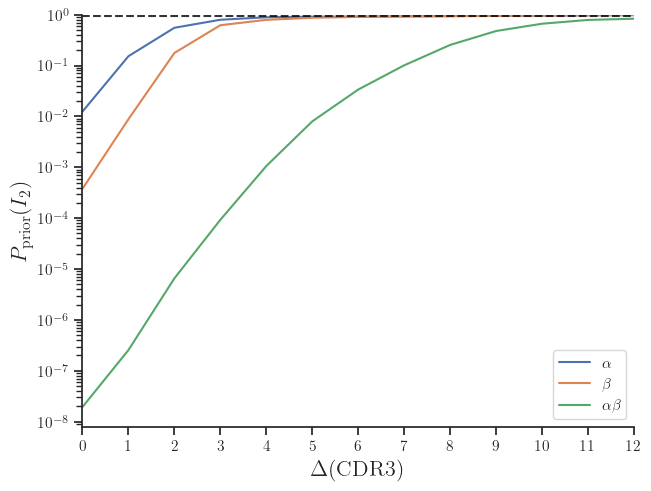

In [6]:
fig, ax = plt.subplots(layout='constrained')

p_T = 0.95
T = p_T/(1-p_T)
f_spc_a = T*2**-entropy_alpha_dist /(1+ T*2**-entropy_alpha_dist)
f_spc_b = T*2**-entropy_beta_dist /(1+ T*2**-entropy_beta_dist)
f_spc_ab = T*2**-entropy_paired_dist /(1+ T*2**-entropy_paired_dist)

ax.plot(f_spc_a, label="$\\alpha$")
ax.plot(f_spc_b, label="$\\beta$")
ax.plot(f_spc_ab, label="$\\alpha\\beta$")
ax.set_xlim([0,12])
ax.set_xlabel("$\Delta$(CDR3)")
ax.set_ylabel("$P_{\mathrm{prior}}(I_2)$")
ax.set_yscale('log')
ax.set_xticks(np.arange(0,13))
ax.set_ylim([None ,1])
ax.axhline(0.95, color='black', linestyle="--", alpha=0.8)
ax.legend()
plt.savefig('figures/figure6.svg',bbox_inches='tight', dpi=500, transparent=True);